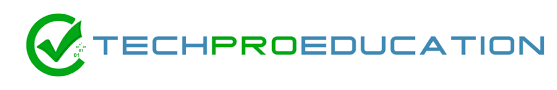

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [3]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
df[df.duplicated()]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season


<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


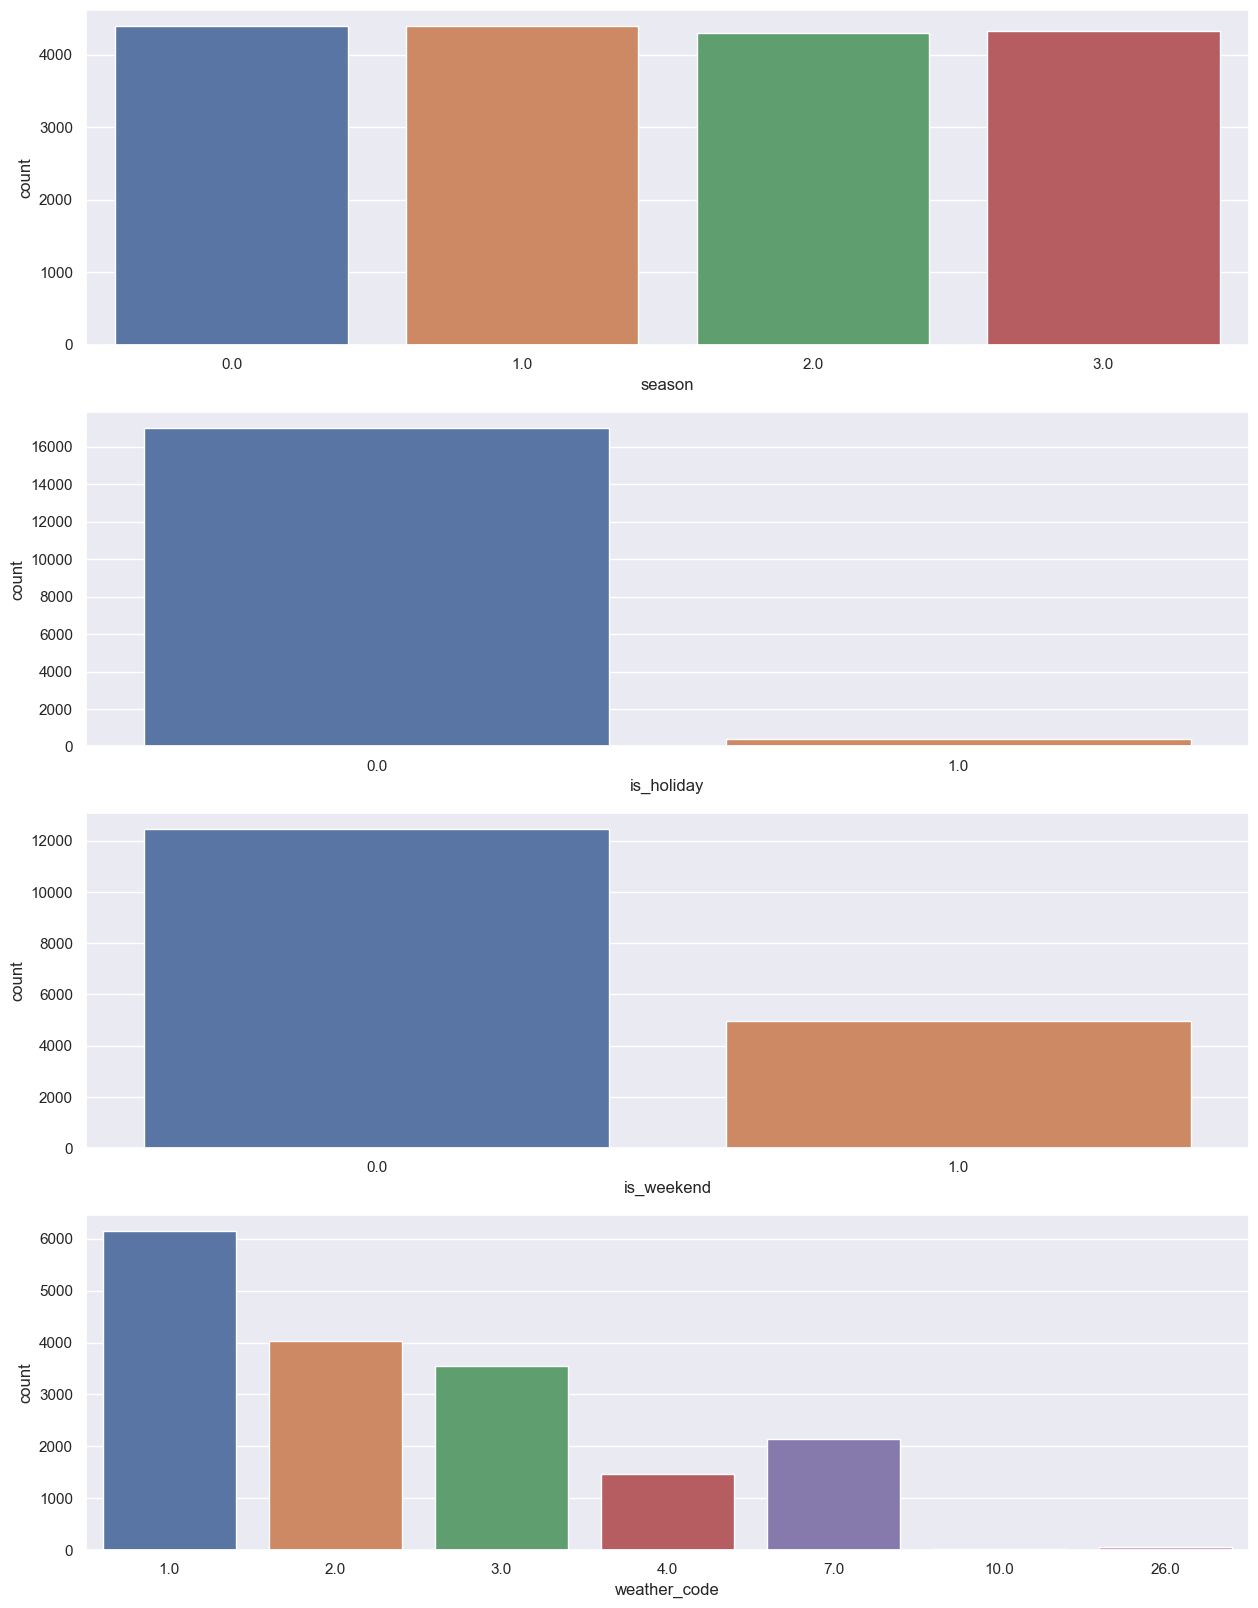

In [5]:
fig, ax = plt.subplots(4, 1, figsize = (15,20))
sns.countplot(x = "season", data = df, ax = ax[0])
sns.countplot(x = "is_holiday", data = df, ax = ax[1])
sns.countplot(x = "is_weekend", data = df, ax = ax[2])
sns.countplot(x = "weather_code", data = df, ax = ax[3]);

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [6]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [7]:
df["timestamp"] = pd.to_datetime(df.timestamp)

In [8]:
df.set_index("timestamp", inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

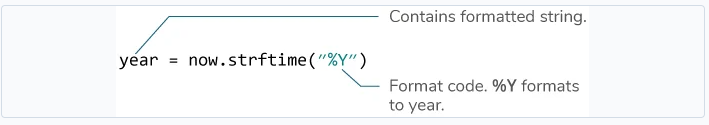

In [9]:
df["year"] = df.index.strftime("%Y").astype("int")
df["month"] = df.index.strftime("%m").astype("int")
df["day_of_month"] = df.index.strftime("%d").astype("int")
df["day_of_week"] = df.index.strftime("%w").astype("int")
df["day_of_name"] = df.index.strftime("%A")
df["hour"] = df.index.strftime("%H").astype("int")
df.sample(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,
2015-07-28 12:00:00,1541,19.0,19.0,49.0,32.5,3.0,0.0,0.0,1.0,2015,7,28,2,Tuesday,12
2016-09-11 00:00:00,576,15.5,15.5,79.5,14.0,2.0,0.0,1.0,2.0,2016,9,11,0,Sunday,0
2015-12-29 10:00:00,739,12.0,12.0,79.5,16.0,2.0,0.0,0.0,3.0,2015,12,29,2,Tuesday,10
2015-07-19 05:00:00,138,16.0,16.0,68.0,14.0,7.0,0.0,1.0,1.0,2015,7,19,0,Sunday,5
2015-07-18 12:00:00,2989,21.5,21.0,34.0,18.0,2.0,0.0,1.0,1.0,2015,7,18,6,Saturday,12


In [10]:
df.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
year              int64
month             int64
day_of_month      int64
day_of_week       int64
day_of_name      object
hour              int64
dtype: object

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

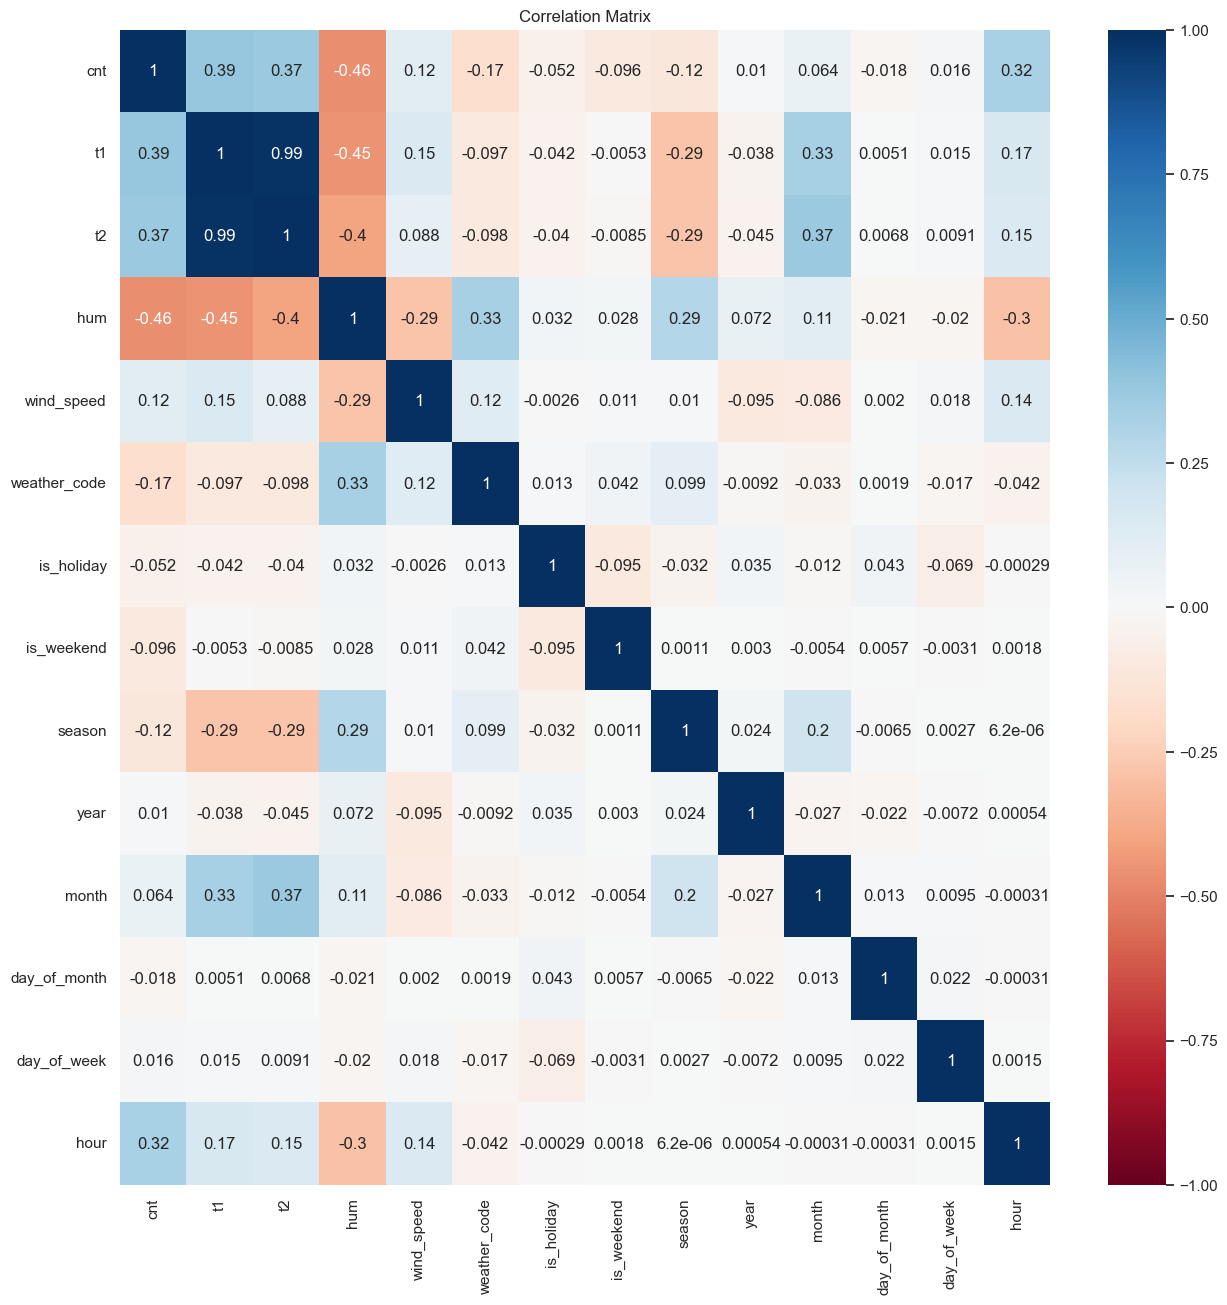

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

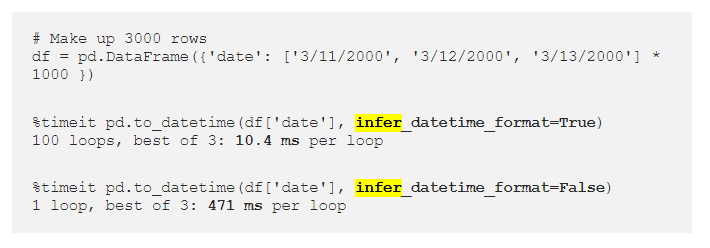

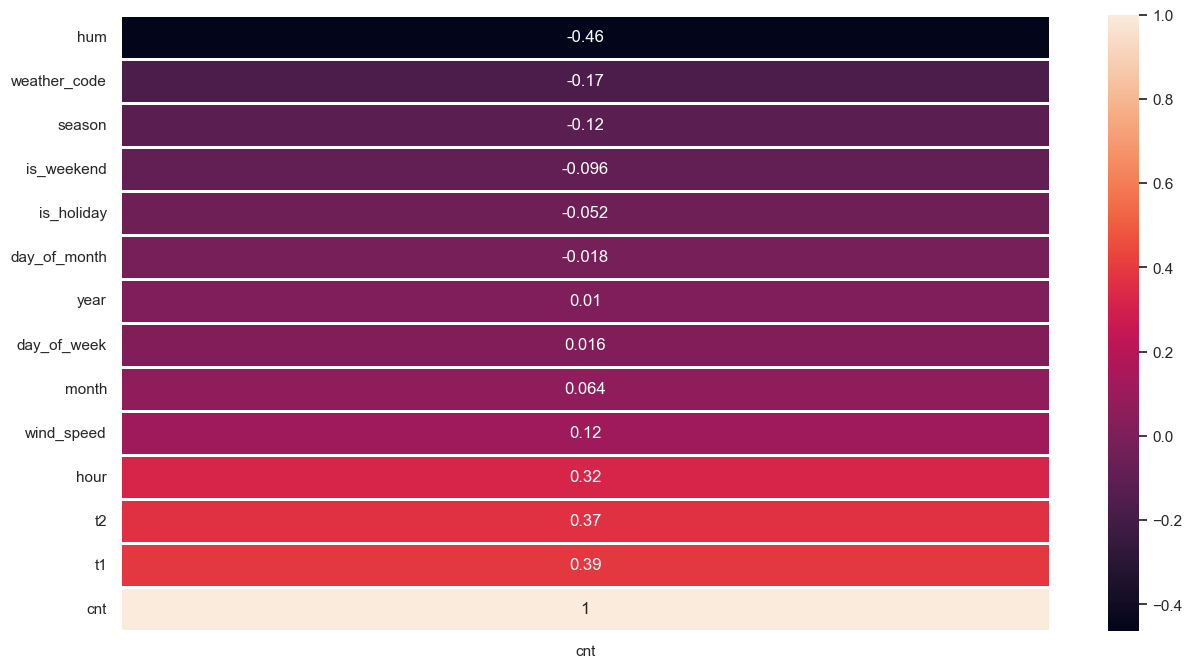

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr()[["cnt"]].sort_values(by="cnt") ,linewidths=1,
            annot=True);

In [13]:
corr_cnt = df.corr()["cnt"]
corr_cnt

cnt             1.000000
t1              0.388798
t2              0.369035
hum            -0.462901
wind_speed      0.116295
weather_code   -0.166633
is_holiday     -0.051698
is_weekend     -0.096499
season         -0.116180
year            0.010046
month           0.063757
day_of_month   -0.017887
day_of_week     0.016346
hour            0.324423
Name: cnt, dtype: float64

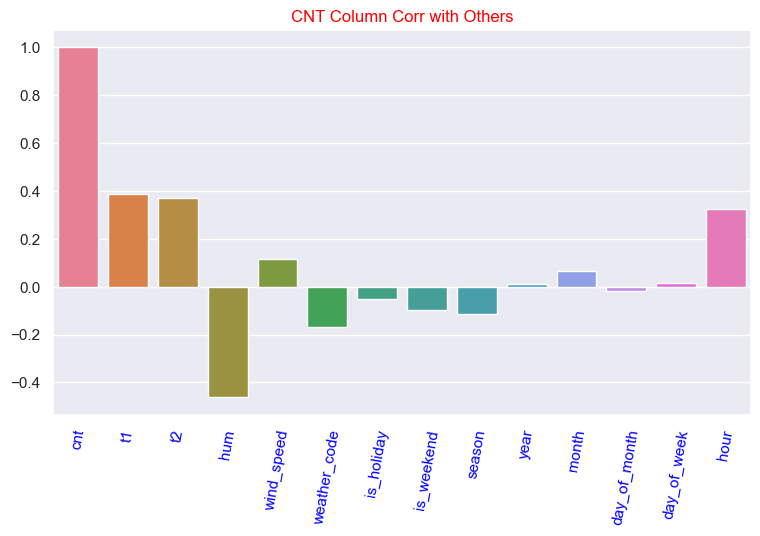

In [14]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.barplot(x = corr_cnt.index, y = corr_cnt.values, palette="husl")
plt.xticks(rotation = 80)
ax.tick_params(axis='x', colors='blue')
ax.set_title("CNT Column Corr with Others", color = "red");

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

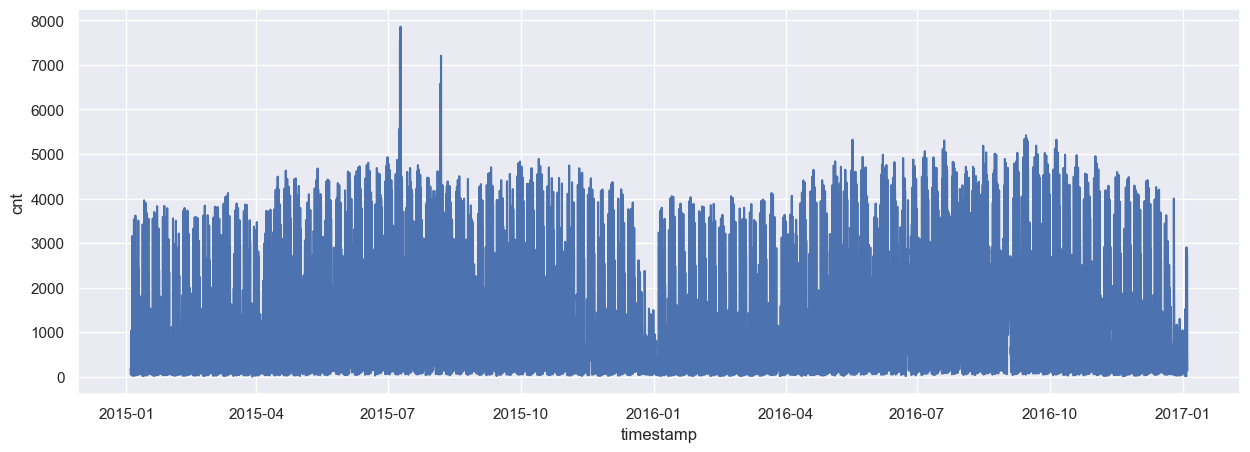

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.index, y="cnt", data=df)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [16]:
df["year_of_month"] = df.index.strftime("%Y-%m")

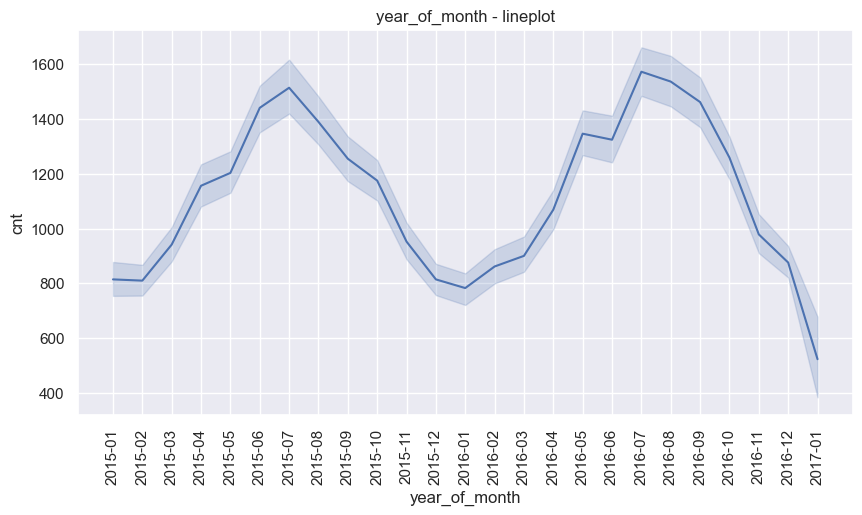

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(x = "year_of_month", y = "cnt", data = df)
plt.xticks(rotation=90)
plt.title("year_of_month - lineplot");

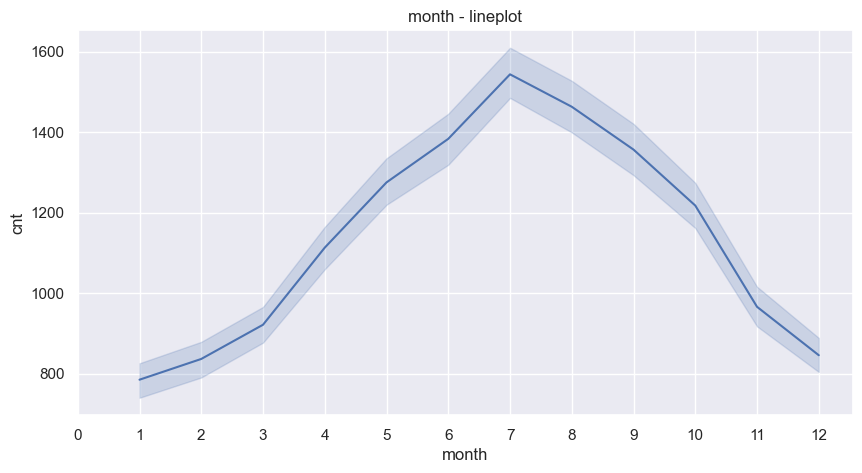

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x = "month", y = "cnt", data = df)
plt.xticks(rotation=0)
plt.xticks(list(range(0,13)))
plt.title("month - lineplot");

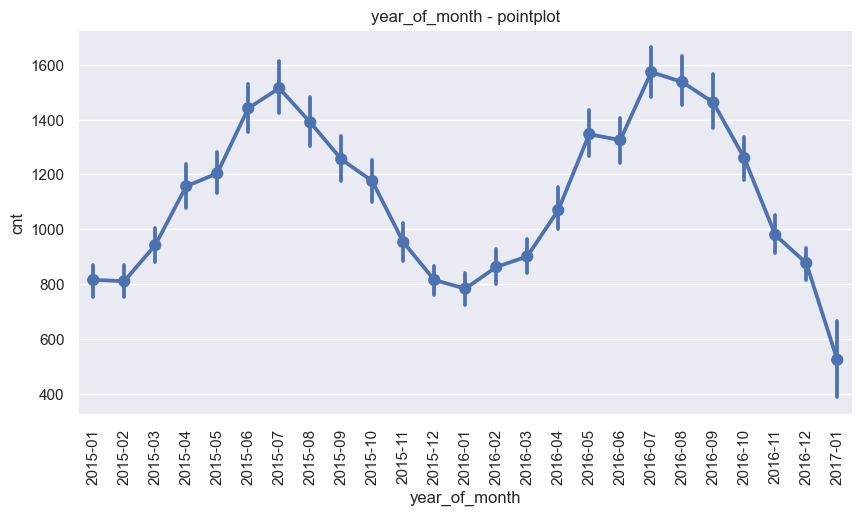

In [19]:
plt.figure(figsize=(10,5))
sns.pointplot(x = "year_of_month", y = "cnt", data = df)
plt.xticks(rotation=90)
plt.title("year_of_month - pointplot");

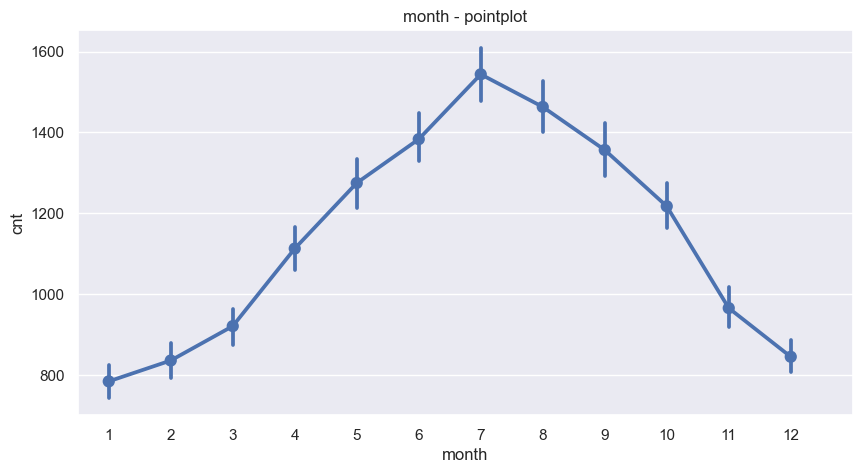

In [20]:
plt.figure(figsize=(10,5))
sns.pointplot(x = "month", y = "cnt", data = df)
plt.xticks(rotation=0)
plt.xticks(list(range(0,13)))
plt.title("month - pointplot");

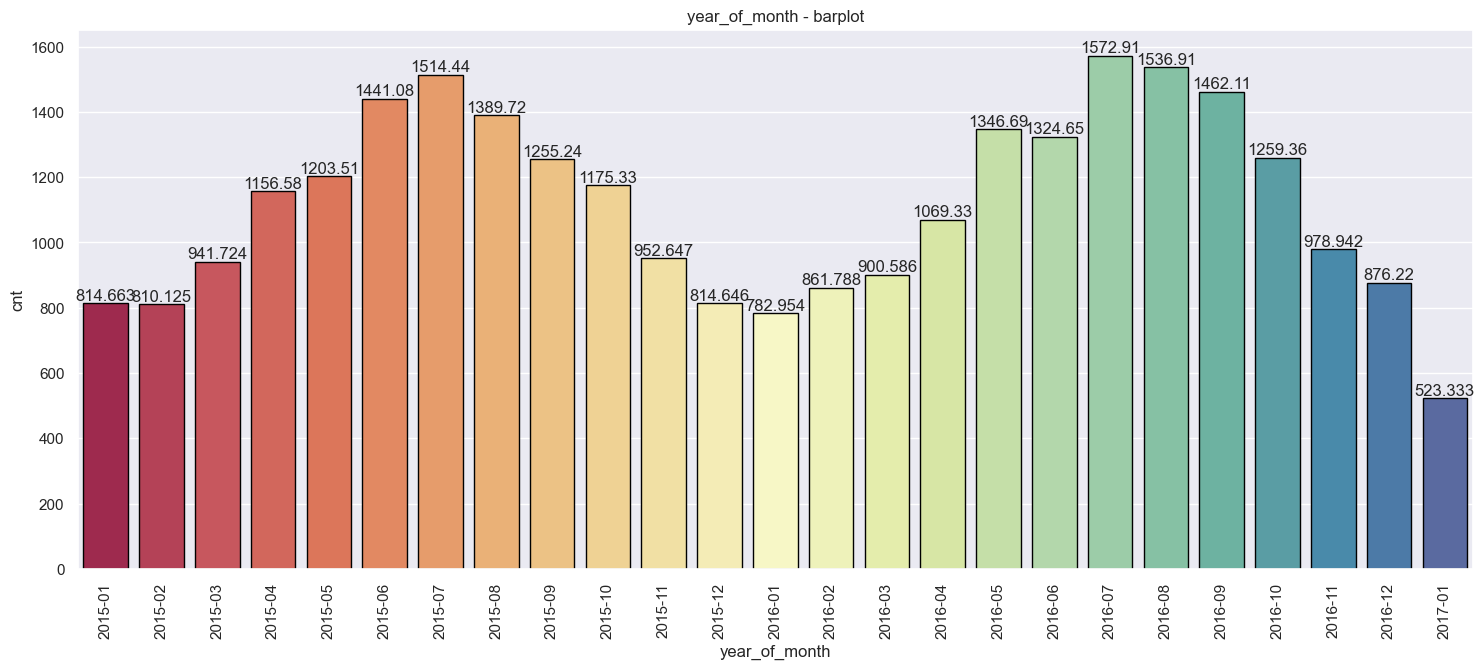

In [21]:
plt.figure(figsize=(18,7))
ax = sns.barplot(x = "year_of_month", y = "cnt", data = df, ci = False, palette='Spectral', edgecolor = "black")
plt.xticks(rotation=90)
plt.title("year_of_month - barplot")
ax.bar_label((ax.containers[0]));

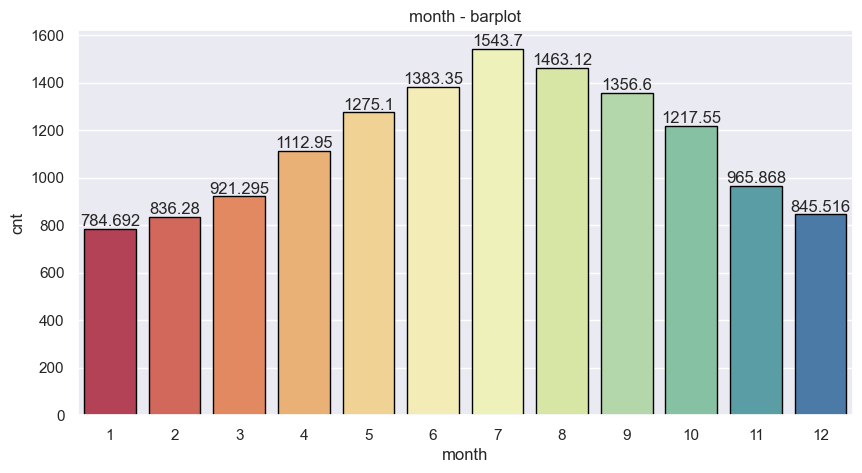

In [22]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = "month", y = "cnt", data = df, ci = False, palette='Spectral', edgecolor = "black")
plt.xticks(rotation=0)
plt.title("month - barplot")
ax.bar_label((ax.containers[0]));

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

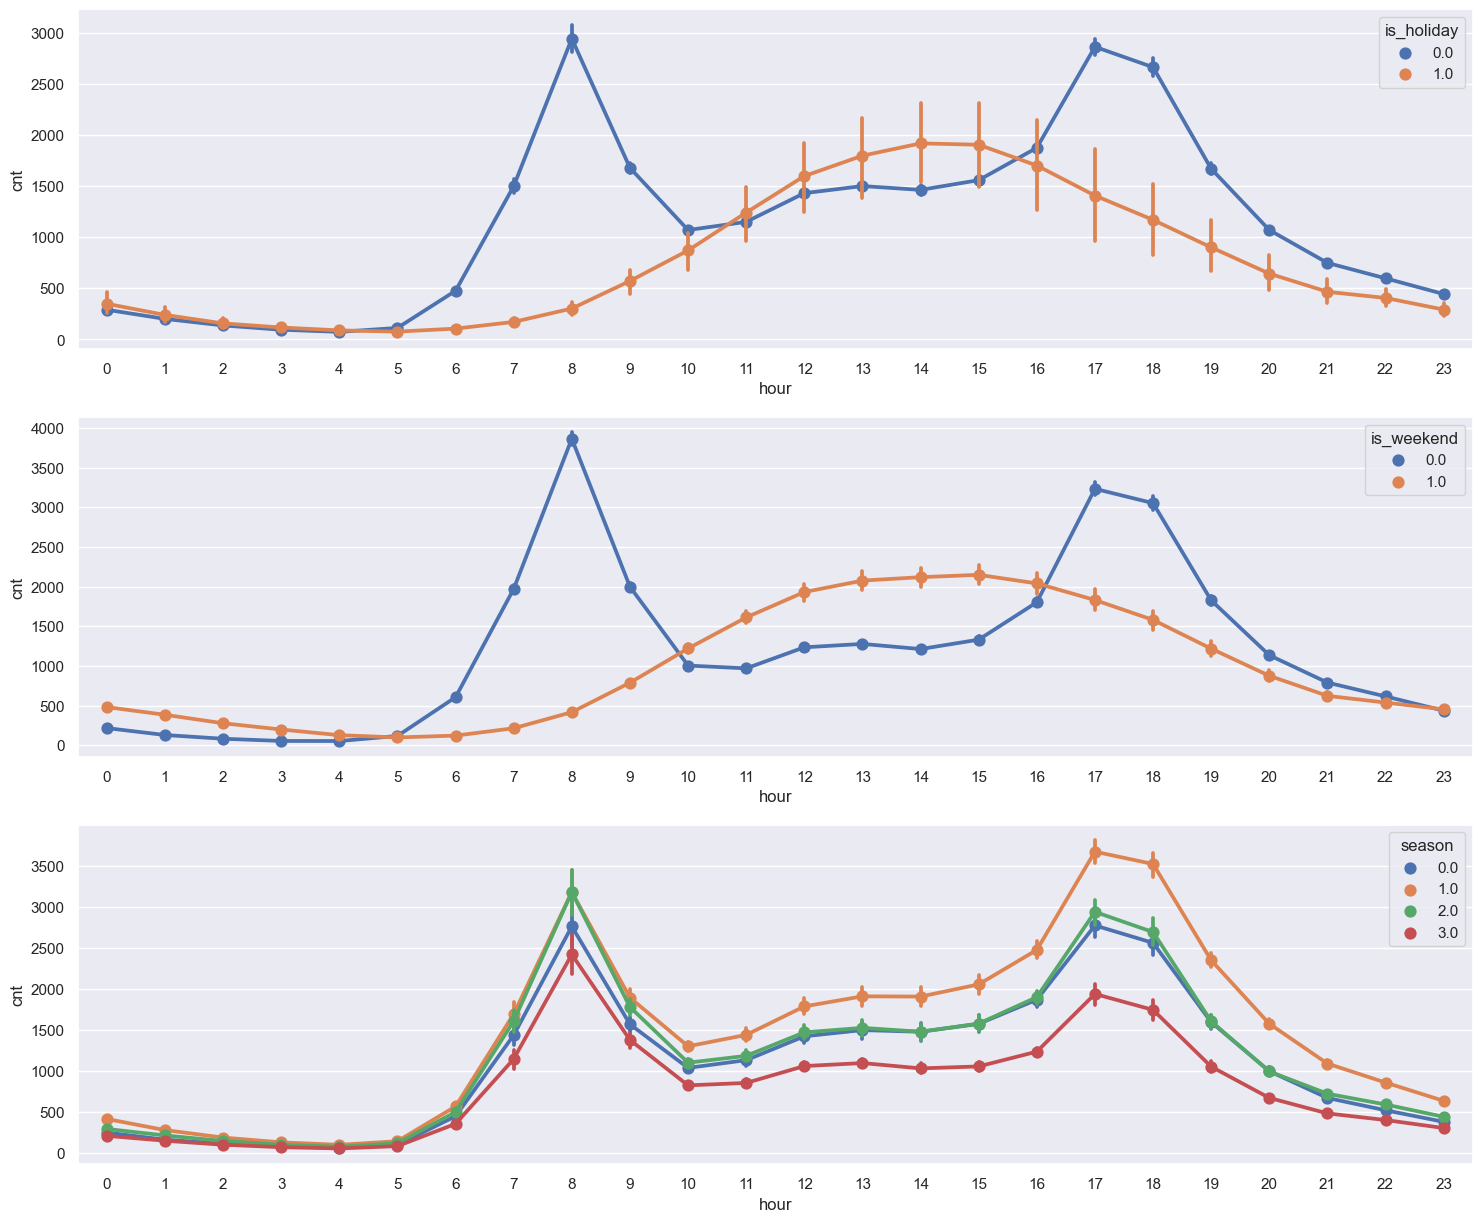

In [23]:
fig, ax = plt.subplots(3, 1, figsize = (18,15))

sns.pointplot(data=df, x="hour", y="cnt", ax = ax[0], hue="is_holiday")
sns.pointplot(data=df, x="hour", y="cnt", ax = ax[1], hue="is_weekend")
sns.pointplot(data=df, x="hour", y="cnt", ax = ax[2], hue="season");

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

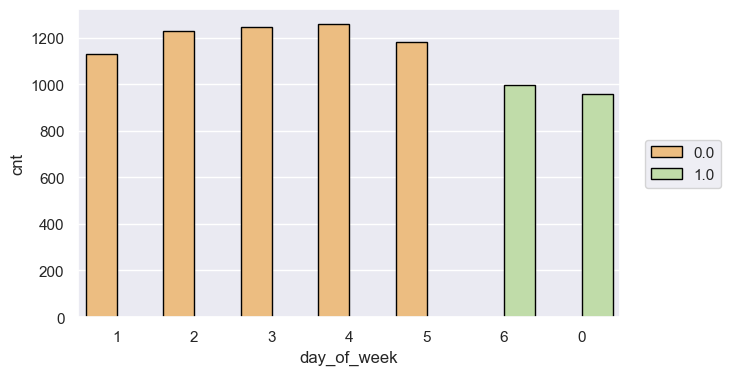

In [31]:
plt.figure(figsize=(7,4))
sns.barplot(x="day_of_week", y="cnt", data=df, hue="is_weekend", order = [1, 2, 3, 4, 5, 6, 0],
           ci = False, palette='Spectral', edgecolor = "black")

plt.legend(bbox_to_anchor = (1.2,0.6,0,0));

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

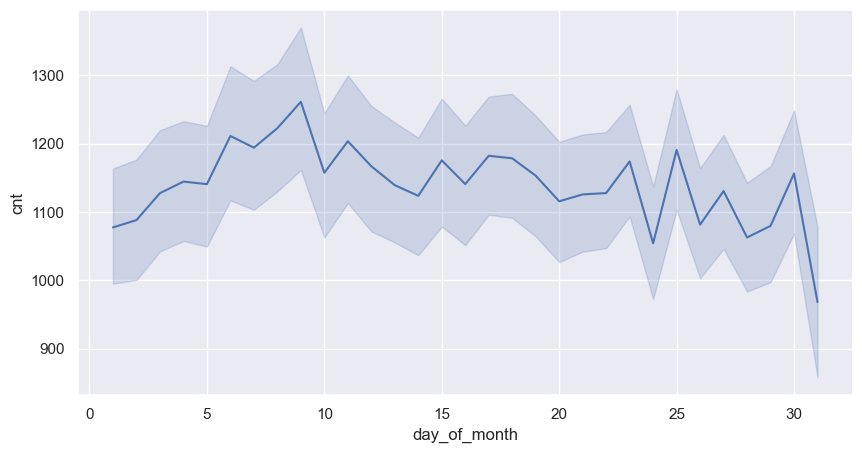

In [25]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = df, x = "day_of_month", y = "cnt");

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

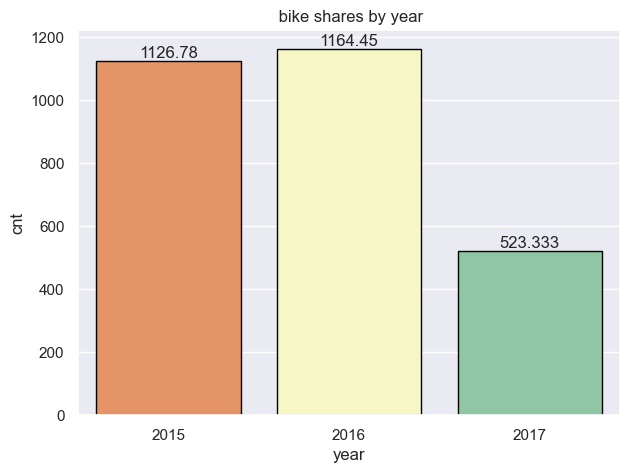

In [26]:
plt.figure(figsize=(7,5))
ax = sns.barplot(x = "year", y = "cnt", data = df, ci = False, palette='Spectral', edgecolor = "black")
plt.xticks(rotation=0)
plt.title(" bike shares by year")
ax.bar_label((ax.containers[0]));

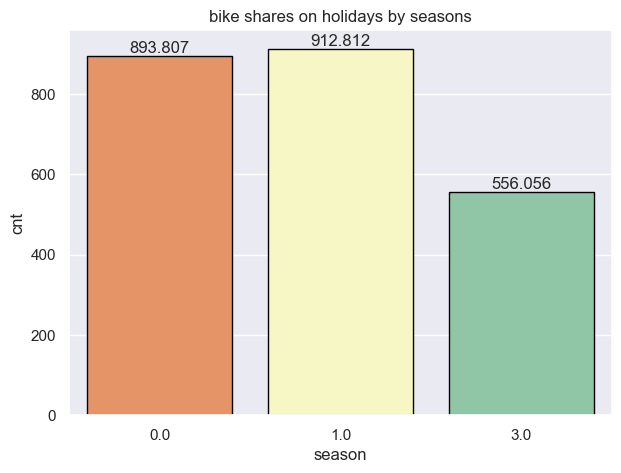

In [27]:
plt.figure(figsize=(7,5))
ax = sns.barplot(x = "season", y = "cnt", data = df[df.is_holiday == 1], ci = False, palette='Spectral', edgecolor = "black")
plt.xticks(rotation=0)
plt.title("bike shares on holidays by seasons")
ax.bar_label((ax.containers[0]));

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

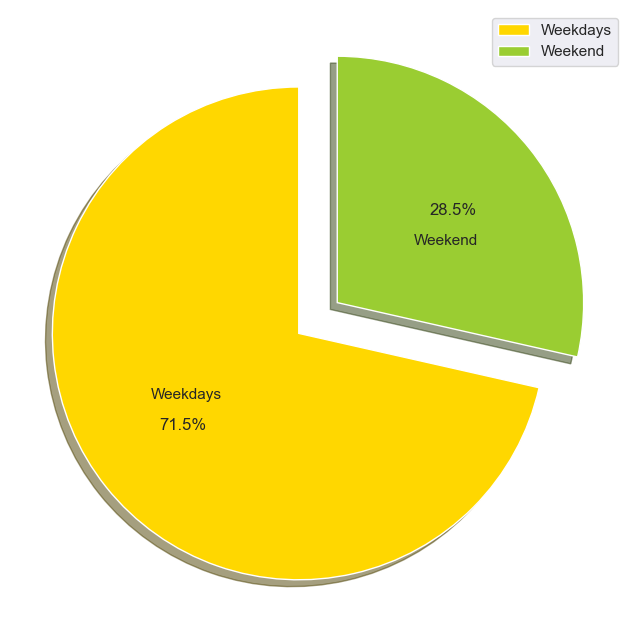

In [28]:
plt.figure(figsize=(10, 8))

color_list = ["gold", "yellowgreen"]
explode_list = [0.1, 0.1]


plt.pie(df.is_weekend.value_counts().values, labels = ["Weekdays", "Weekend"], labeldistance = 0.4, 
        autopct="%.1f%%", startangle = 90, shadow = True, pctdistance=0.6, 
        colors=color_list, explode = explode_list)

plt.legend(loc=(0))
plt.show()

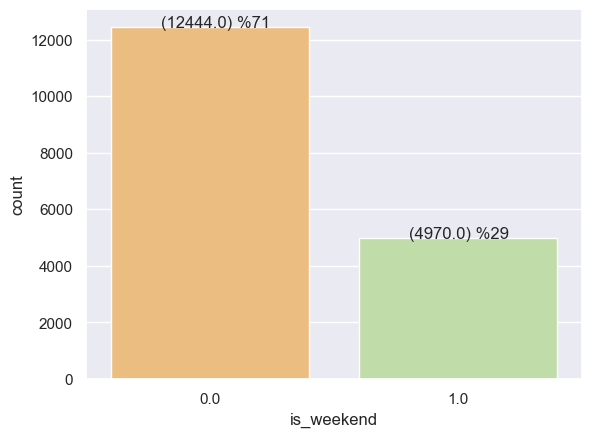

In [29]:
ax = sns.countplot(x = 'is_weekend', data=df, palette='Spectral')
for p in ax.patches:
    ax.annotate("("+str((p.get_height()))+")" + " "
                "%" + str(round(round((p.get_height())/ df.is_weekend.count(), 2)*100)), (p.get_x() + 0.20, p.get_height()-10));

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

In [32]:
df["season"] = df.season.replace(0.0, "spring")
df["season"] = df.season.replace(1.0, "summer")
df["season"] = df.season.replace(2.0, "fall")
df["season"] = df.season.replace(3.0, "winter")

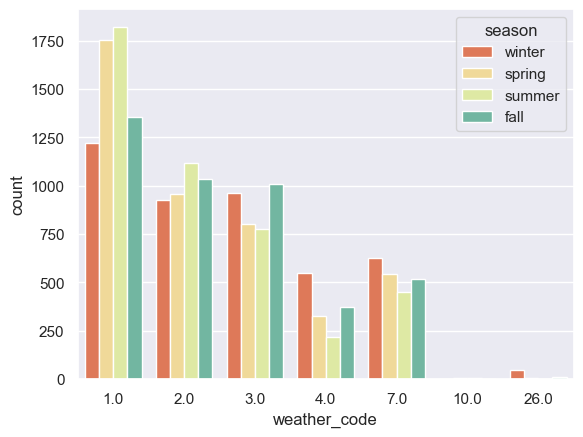

In [33]:
sns.countplot(x = 'weather_code', data=df, palette='Spectral', hue = "season");

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

# - Hum sütununun cnt, t1 ve t2 sütunu ile orta derece ve ters correlation olduğu görülüyor

# - Hum sütununun season ve weather_code sütunları arasında zayıf correlation olduğu görülüyor

# - t1(the real tempature) ve t2(the felt temperature) sütünları hemen hemen aynı değerler olduğu için iki sütun arasında güçlü bir correlation var

# - 10. sorudaki grafiğe bakarak kış aylarından yaz aylarına doğru artış var, kış aylarında en düşük, yaz aylarında en yüksek.

# -  11. sorudaki grafiğe bakarak hafta içi bisiklet kullanımında mesai saatleri başlangıç ve bitiş zamanlarında bir artış olduğu görünüyor

# - Hafta sonları ve tatil günlerinde ise bisiklet kullanımında öğle saatleri ve akşam saatleri arasında bir artış olduğu görünüyor

# -  Yaz mevisiminde mesai çıkışı bisiklet kullanımının fazla olduğunu görüyoruz.

# - 12. sorunun grafiğinde hafta içi bisiklet kullanımının hafta sonu bisiklet kullanımından daha fazla olduğu görülüyor.

# - 14. sorunun grafiğine baktığımızda 2015 ve 2016 yıllarında ortalama bisiklet kullanımında büyük bir fark olmadığını görüyoruz.

# -  Mevsimlerden sonbahar ve tatil olan durumlarımda verimiz yok

# - 16. sorudaki grafiğimizde hava şartlarının iyi olduğu durumlarda bisiklet kullanımının daha fazla olduğu görülüyor.

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

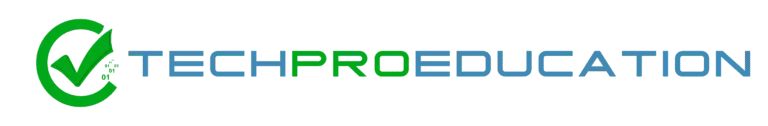